In [1]:
# ==================================================================
# Thilina Jayathilaka - 209338R
# SOM Visualization for Iris dataset
# ==================================================================

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:

def closest_node(data, t, map, m_rows, m_cols):
    result = (0,0)
    small_dist = 1.0e20
    for i in range(m_rows):
        for j in range(m_cols):
            ed = euclidean_dist(map[i][j], data[t])
            if ed < small_dist:
                small_dist = ed
                result = (i, j)
    return result

In [4]:
def euclidean_dist(v1, v2):
    return np.linalg.norm(v1 - v2) 

In [5]:
def manhattan_dist(r1, c1, r2, c2):
    return np.abs(r1-r2) + np.abs(c1-c2)

In [6]:
# outputs the most common number in a given list
def most_common(lst, n):
    if len(lst) == 0: return -1
    counts = np.zeros(shape=n, dtype=np.int)
    for i in range(len(lst)):
        counts[lst[i]] += 1
    return np.argmax(counts)

In [7]:
def som_iris_visualization(rows, cols, learning_rate, steps_max):
    # 1 - Initilizations
    np.random.seed(1)
    dim = 4
#     rows = 30; cols = 30
    range_max = rows + cols
#     learning_rate = 0.5
#     steps_max = 5000

    # 2 - Loading IRIS data
    print("\nLoading Iris data into memory \n")
    data_file = "iris.txt"
    X = np.loadtxt(data_file, delimiter=",", usecols=range(0,4), dtype=np.float64)
    Y = np.loadtxt(data_file, delimiter=",", usecols=[4], dtype=np.int)

    # 3 - SOM Implementation
    print(f"Constructing a {rows}x{cols} SOM from the iris data")
    map = np.random.random_sample(size=(rows,cols,dim))
    for s in range(steps_max):
        if s % (steps_max/10) == 0: print("finised step = ", str(s))
        pct_left = 1.0 - ((s * 1.0) / steps_max)
        curr_range = (int)(pct_left * range_max)
        curr_rate = pct_left * learning_rate

        t = np.random.randint(len(X))
        (bmu_row, bmu_col) = closest_node(X, t, map, rows, cols)
        for i in range(rows):
            for j in range(cols):
                if manhattan_dist(bmu_row, bmu_col, i, j) < curr_range:
                    map[i][j] = map[i][j] + curr_rate * (X[t] - map[i][j])
    print("SOM construction complete \n")

    # 4 - Constructing the Unified Distance Matrix / U-Matrix
    print("Constructing Unified Distance Matrix / U-Matrix from SOM")
    ud_mat = np.zeros(shape=(rows,cols), dtype=np.float64)
    for i in range(rows):
        for j in range(cols):
            v = map[i][j]
            sum_dists = 0.0; ct = 0
     
            if i-1 >= 0:
                sum_dists += euclidean_dist(v, map[i-1][j]); ct += 1
            if i+1 <= rows-1:
                sum_dists += euclidean_dist(v, map[i+1][j]); ct += 1
            if j-1 >= 0:
                sum_dists += euclidean_dist(v, map[i][j-1]); ct += 1
            if j+1 <= cols-1:
                sum_dists += euclidean_dist(v, map[i][j+1]); ct += 1
      
            ud_mat[i][j] = sum_dists / ct
    print("Unified Distance Matrix / U-Matrix constructed \n")

    # 5 - 2D Visualization of SOM using Unified Distance Matrix
    plt.title(f"{rows}x{cols} - {learning_rate} lr - {steps_max}")
    plt.imshow(ud_mat, cmap='gray')
    plt.savefig(f"{rows}x{cols} - {learning_rate*100} - {steps_max}.png")
    plt.show()


Loading Iris data into memory 

Constructing a 16x16 SOM from the iris data
finised step =  0
finised step =  500
finised step =  1000
finised step =  1500
finised step =  2000
finised step =  2500
finised step =  3000
finised step =  3500
finised step =  4000
finised step =  4500
SOM construction complete 

Constructing Unified Distance Matrix / U-Matrix from SOM
Unified Distance Matrix / U-Matrix constructed 



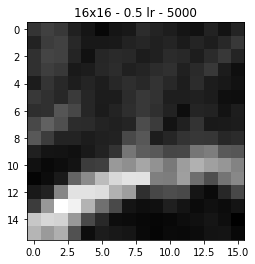

In [8]:
som_iris_visualization(16, 16, 0.5, 5000)


Loading Iris data into memory 

Constructing a 20x20 SOM from the iris data
finised step =  0
finised step =  500
finised step =  1000
finised step =  1500
finised step =  2000
finised step =  2500
finised step =  3000
finised step =  3500
finised step =  4000
finised step =  4500
SOM construction complete 

Constructing Unified Distance Matrix / U-Matrix from SOM
Unified Distance Matrix / U-Matrix constructed 



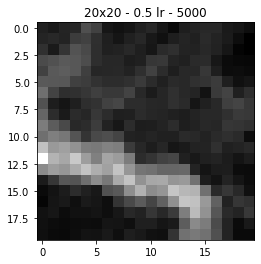

In [9]:
som_iris_visualization(20, 20, 0.5, 5000)


Loading Iris data into memory 

Constructing a 24x24 SOM from the iris data
finised step =  0
finised step =  500
finised step =  1000
finised step =  1500
finised step =  2000
finised step =  2500
finised step =  3000
finised step =  3500
finised step =  4000
finised step =  4500
SOM construction complete 

Constructing Unified Distance Matrix / U-Matrix from SOM
Unified Distance Matrix / U-Matrix constructed 



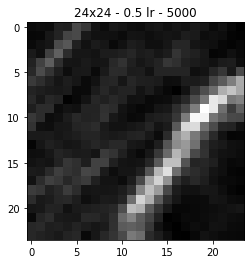

In [10]:
som_iris_visualization(24, 24, 0.5, 5000)


Loading Iris data into memory 

Constructing a 32x32 SOM from the iris data
finised step =  0
finised step =  500
finised step =  1000
finised step =  1500
finised step =  2000
finised step =  2500
finised step =  3000
finised step =  3500
finised step =  4000
finised step =  4500
SOM construction complete 

Constructing Unified Distance Matrix / U-Matrix from SOM
Unified Distance Matrix / U-Matrix constructed 



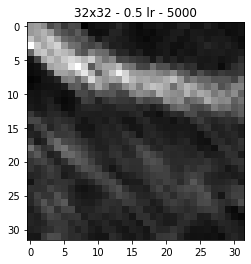

In [11]:
som_iris_visualization(32, 32, 0.5, 5000)


Loading Iris data into memory 

Constructing a 64x64 SOM from the iris data
finised step =  0
finised step =  500
finised step =  1000
finised step =  1500
finised step =  2000
finised step =  2500
finised step =  3000
finised step =  3500
finised step =  4000
finised step =  4500
SOM construction complete 

Constructing Unified Distance Matrix / U-Matrix from SOM
Unified Distance Matrix / U-Matrix constructed 



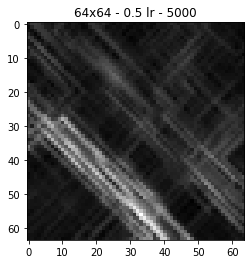

In [12]:
som_iris_visualization(64, 64, 0.5, 5000)


Loading Iris data into memory 

Constructing a 64x64 SOM from the iris data
finised step =  0
finised step =  250
finised step =  500
finised step =  750
finised step =  1000
finised step =  1250
finised step =  1500
finised step =  1750
finised step =  2000
finised step =  2250
SOM construction complete 

Constructing Unified Distance Matrix / U-Matrix from SOM
Unified Distance Matrix / U-Matrix constructed 



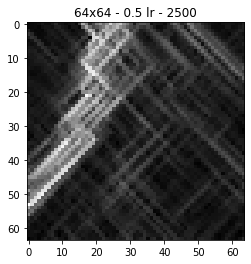

In [17]:
som_iris_visualization(64, 64, 0.5, 2500)


Loading Iris data into memory 

Constructing a 32x32 SOM from the iris data
finised step =  0
finised step =  500
finised step =  1000
finised step =  1500
finised step =  2000
finised step =  2500
finised step =  3000
finised step =  3500
finised step =  4000
finised step =  4500
SOM construction complete 

Constructing Unified Distance Matrix / U-Matrix from SOM
Unified Distance Matrix / U-Matrix constructed 



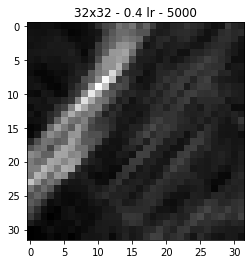

In [18]:
som_iris_visualization(32, 32, 0.4, 5000)


Loading Iris data into memory 

Constructing a 32x32 SOM from the iris data
finised step =  0
finised step =  500
finised step =  1000
finised step =  1500
finised step =  2000
finised step =  2500
finised step =  3000
finised step =  3500
finised step =  4000
finised step =  4500
SOM construction complete 

Constructing Unified Distance Matrix / U-Matrix from SOM
Unified Distance Matrix / U-Matrix constructed 



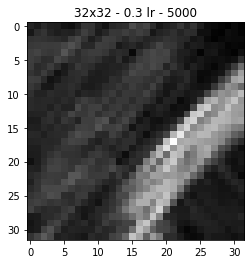

In [19]:
som_iris_visualization(32, 32, 0.3, 5000)


Loading Iris data into memory 

Constructing a 32x32 SOM from the iris data
finised step =  0
finised step =  500
finised step =  1000
finised step =  1500
finised step =  2000
finised step =  2500
finised step =  3000
finised step =  3500
finised step =  4000
finised step =  4500
SOM construction complete 

Constructing Unified Distance Matrix / U-Matrix from SOM
Unified Distance Matrix / U-Matrix constructed 



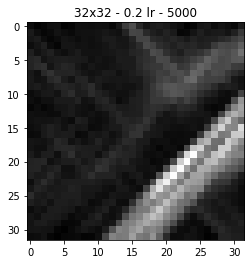

In [20]:
som_iris_visualization(32, 32, 0.2, 5000)